<a href="https://colab.research.google.com/github/MFH97/Artificial-Intelligence/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression tutorial

Dataset: https://www.kaggle.com/datasets/pankajvermacool/titanic-traincsv/data



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pankajvermacool/titanic-traincsv")

print("Path to dataset files:", path)

100%|██████████| 22.0k/22.0k [00:00<00:00, 6.56MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/pankajvermacool/titanic-traincsv/versions/1


In [4]:
import os

# Check contents of the actual downloaded path
print("Downloaded files:", os.listdir(path))


Downloaded files: ['titanic_train.csv']


In [22]:
df = pd.read_csv(os.path.join(path, 'titanic_train.csv'))

# Data exploration
print(df.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [23]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [24]:
# Handle missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-24-494f1d2b1848>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-24-494f1d2b1848>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [25]:
# Drop unnecessary columns
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

**one-hot encoded**

In [26]:
# Convert categorical to numerical
df = pd.get_dummies(df, drop_first=True)

In [27]:
# Split the dataset
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [30]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)


In [31]:
print(confusion_matrix(y_test, y_pred))


[[90 15]
 [19 55]]


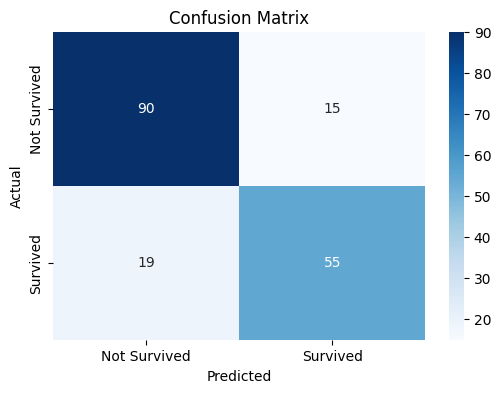

In [32]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 📊 Confusion Matrix
This means:

True Negatives (TN): 90 passengers correctly predicted as not survived

False Positives (FP): 15 passengers incorrectly predicted as survived

False Negatives (FN): 19 passengers incorrectly predicted as not survived

True Positives (TP): 55 passengers correctly predicted as survived

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# 🧠 Classification Report Summary

Accuracy: 81% of all predictions were correct.

Precision: The model is slightly more precise on non-survivors.

Recall: It’s better at detecting non-survivors than survivors.

F1-score: Balanced performance overall, but slightly better for class 0.

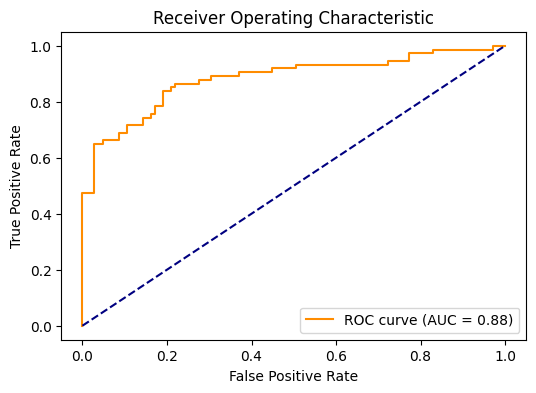

In [34]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


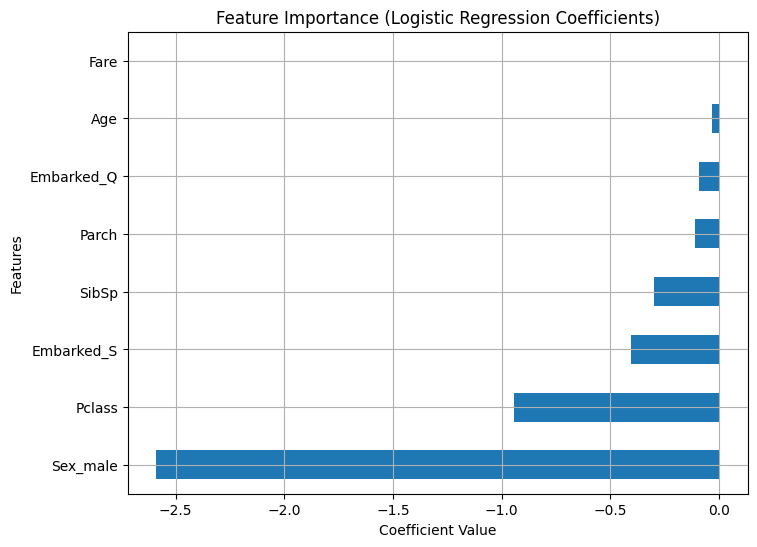

In [35]:
# Coefficients
coefficients = pd.Series(model.coef_[0], index=X.columns)

# Plot
plt.figure(figsize=(8,6))
coefficients.sort_values().plot(kind='barh')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(True)
plt.show()


In [36]:
print(df.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [37]:
print(df.columns)


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [43]:
print(df.columns)
print(df[['Sex_male', 'Survived']].head())


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Sex', 'Survived_label', 'Gender'],
      dtype='object')
   Sex_male  Survived
0      True         0
1     False         1
2     False         1
3     False         1
4      True         0


In [47]:
print(df[['Sex_male', 'Survived']].dropna().shape)



(891, 2)


In [48]:
print(df['Sex_male'].value_counts())


Sex_male
True     577
False    314
Name: count, dtype: int64


In [49]:

print(df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

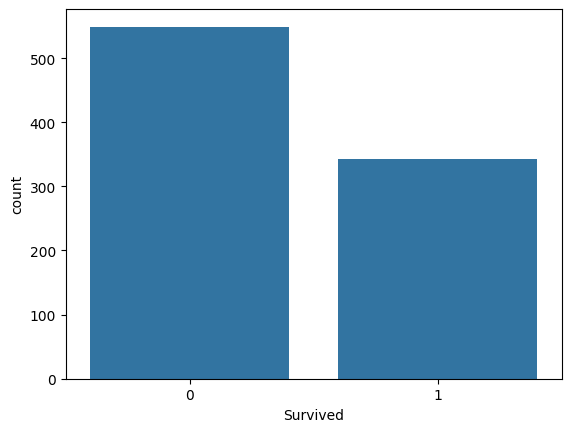

In [ ]:
#visualization survived and dead people using counterplot
sns.countplot(x=df['Survived'],data=df)

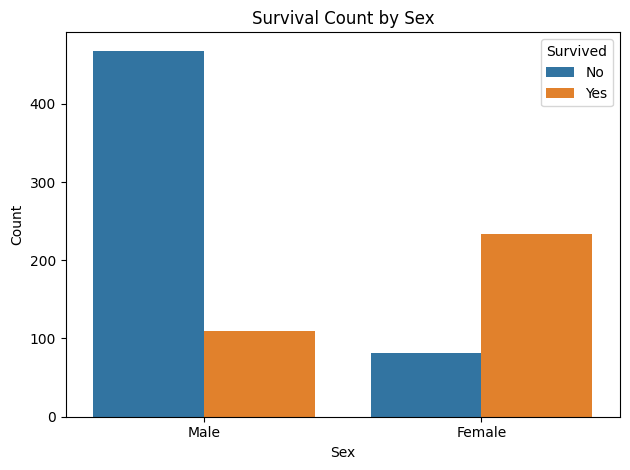

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert boolean to readable string
df['Sex'] = df['Sex_male'].map({True: 'Male', False: 'Female'})
df['Survived_label'] = df['Survived'].map({1: 'Yes', 0: 'No'})

# Plot
sns.countplot(data=df, x='Sex', hue='Survived_label')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.tight_layout()
plt.show()


1. Survival by Passenger Class

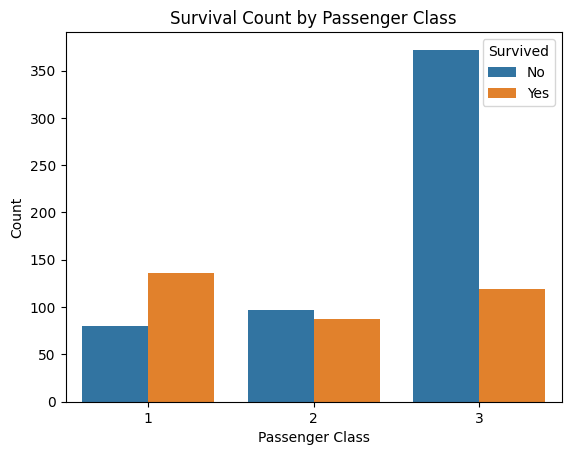

In [ ]:
sns.countplot(data=titanic_data, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


2. Age Distribution of Survivors vs Non-Survivors

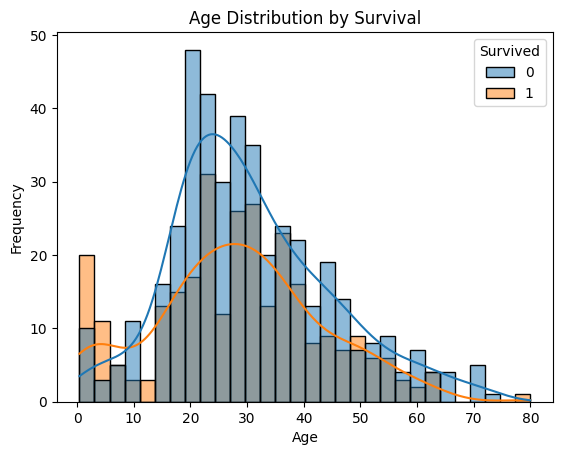

In [ ]:
sns.histplot(data=titanic_data, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


3. Survival by Embarked Location



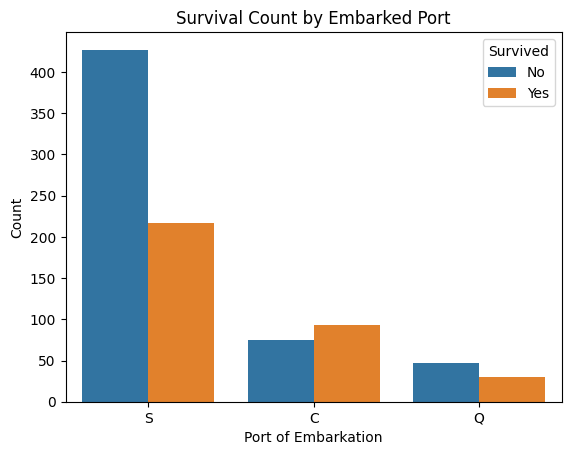

In [ ]:
sns.countplot(data=titanic_data, x='Embarked', hue='Survived')
plt.title('Survival Count by Embarked Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
